<a href="https://colab.research.google.com/github/Mihail15315/Airline-Passenger-Satisfaction/blob/main/airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading data

In [2]:
! gdown 1jdljEVcoxqTk0hbMNOxUN9b3bCMPUfwL
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('/content/train.csv')
pd.set_option('display.max_columns', None)
df.drop(columns='id', inplace=True)
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

Downloading...
From: https://drive.google.com/uc?id=1jdljEVcoxqTk0hbMNOxUN9b3bCMPUfwL
To: /content/train.csv
100% 12.2M/12.2M [00:00<00:00, 89.2MB/s]


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


#Cleaning

In [4]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())
df.isnull().sum()

,0
Unnamed: 0,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0


#Charts

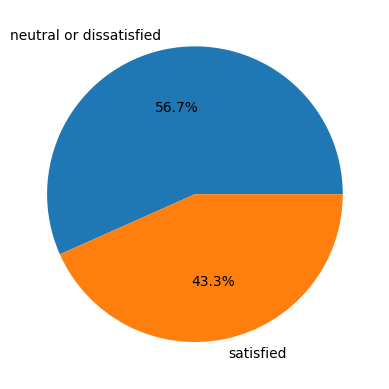

In [7]:
plt.pie(df['satisfaction'].value_counts(), labels=['neutral or dissatisfied', 'satisfied'], autopct='%1.1f%%')
plt.show()

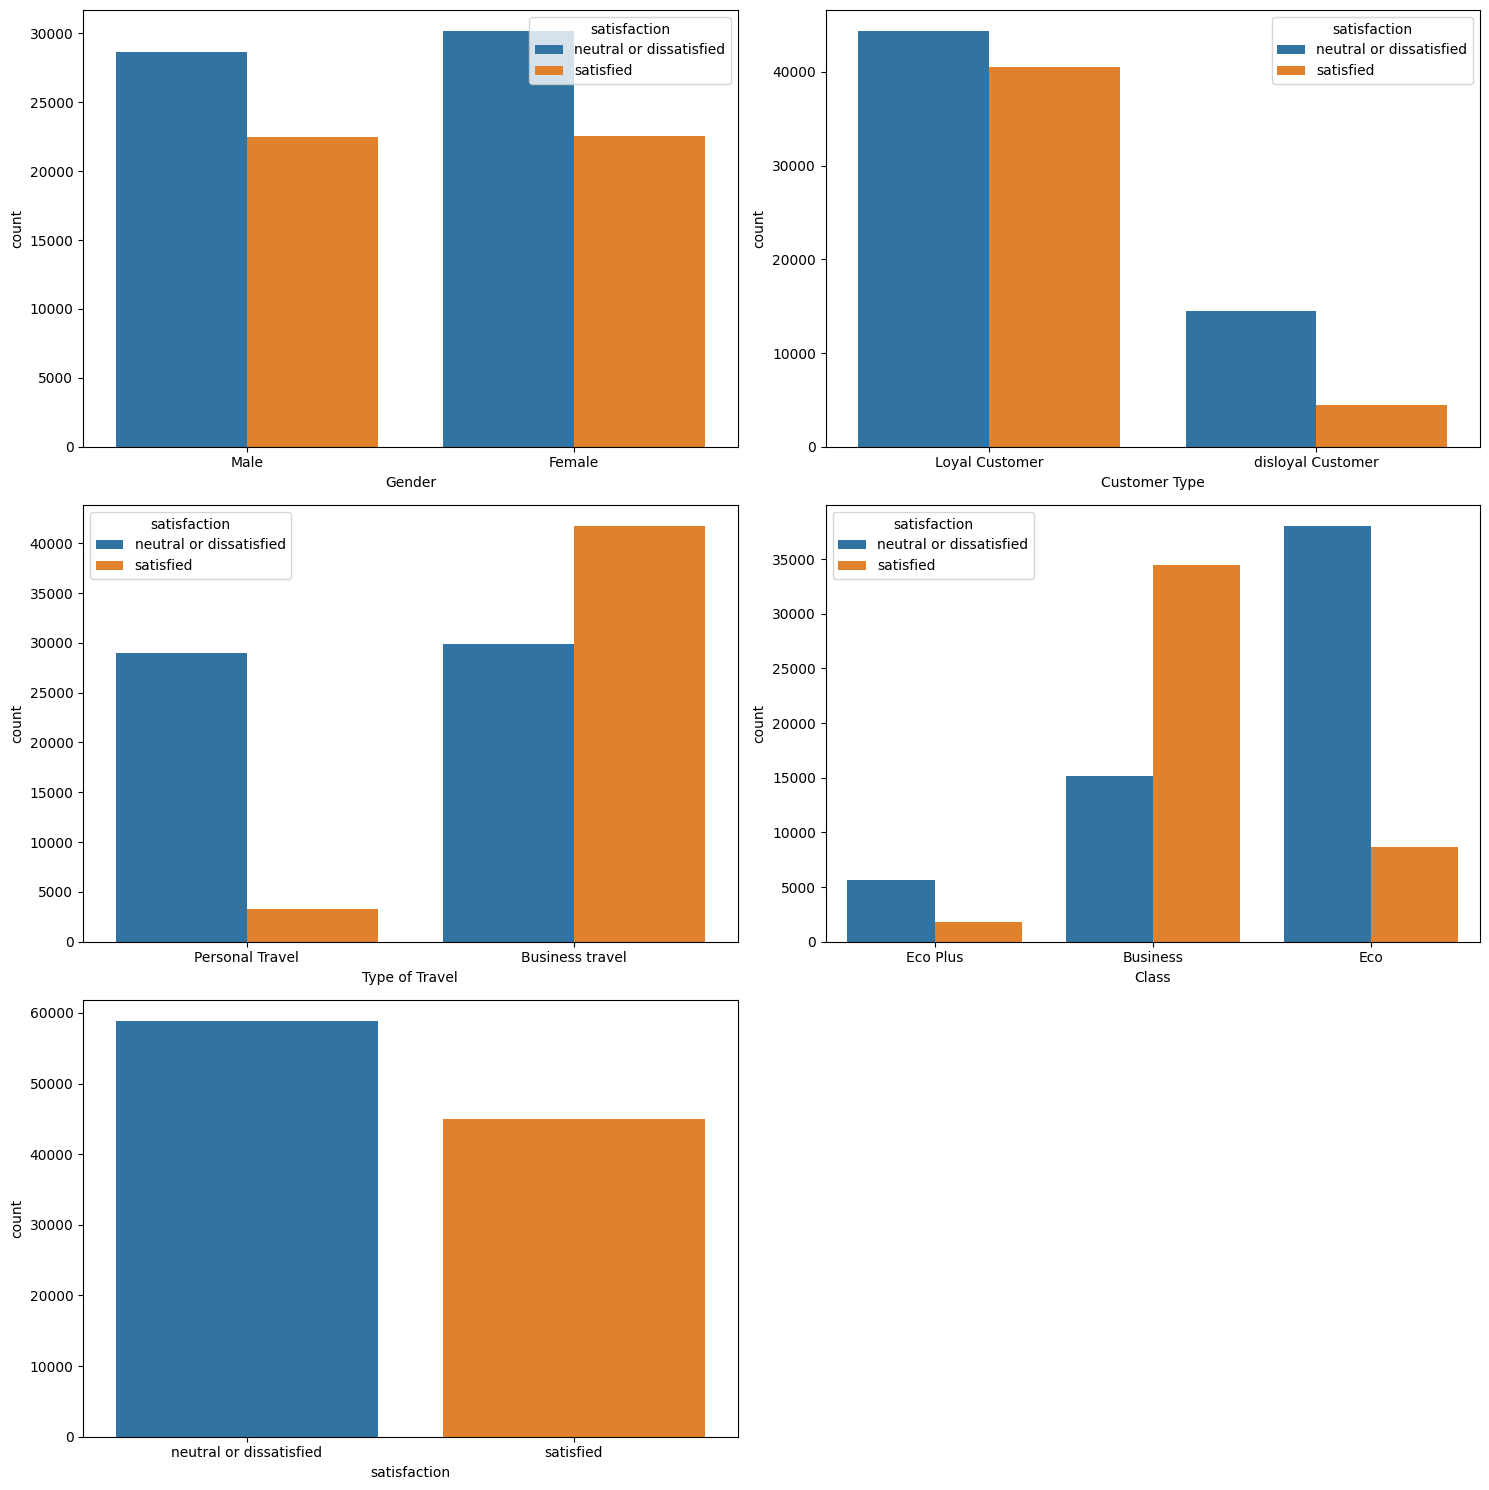

In [11]:
cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
plt.figure(figsize=(15, 15))
for i, col in enumerate(cols):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=col, hue='satisfaction', data=df)
plt.tight_layout()
plt.show()

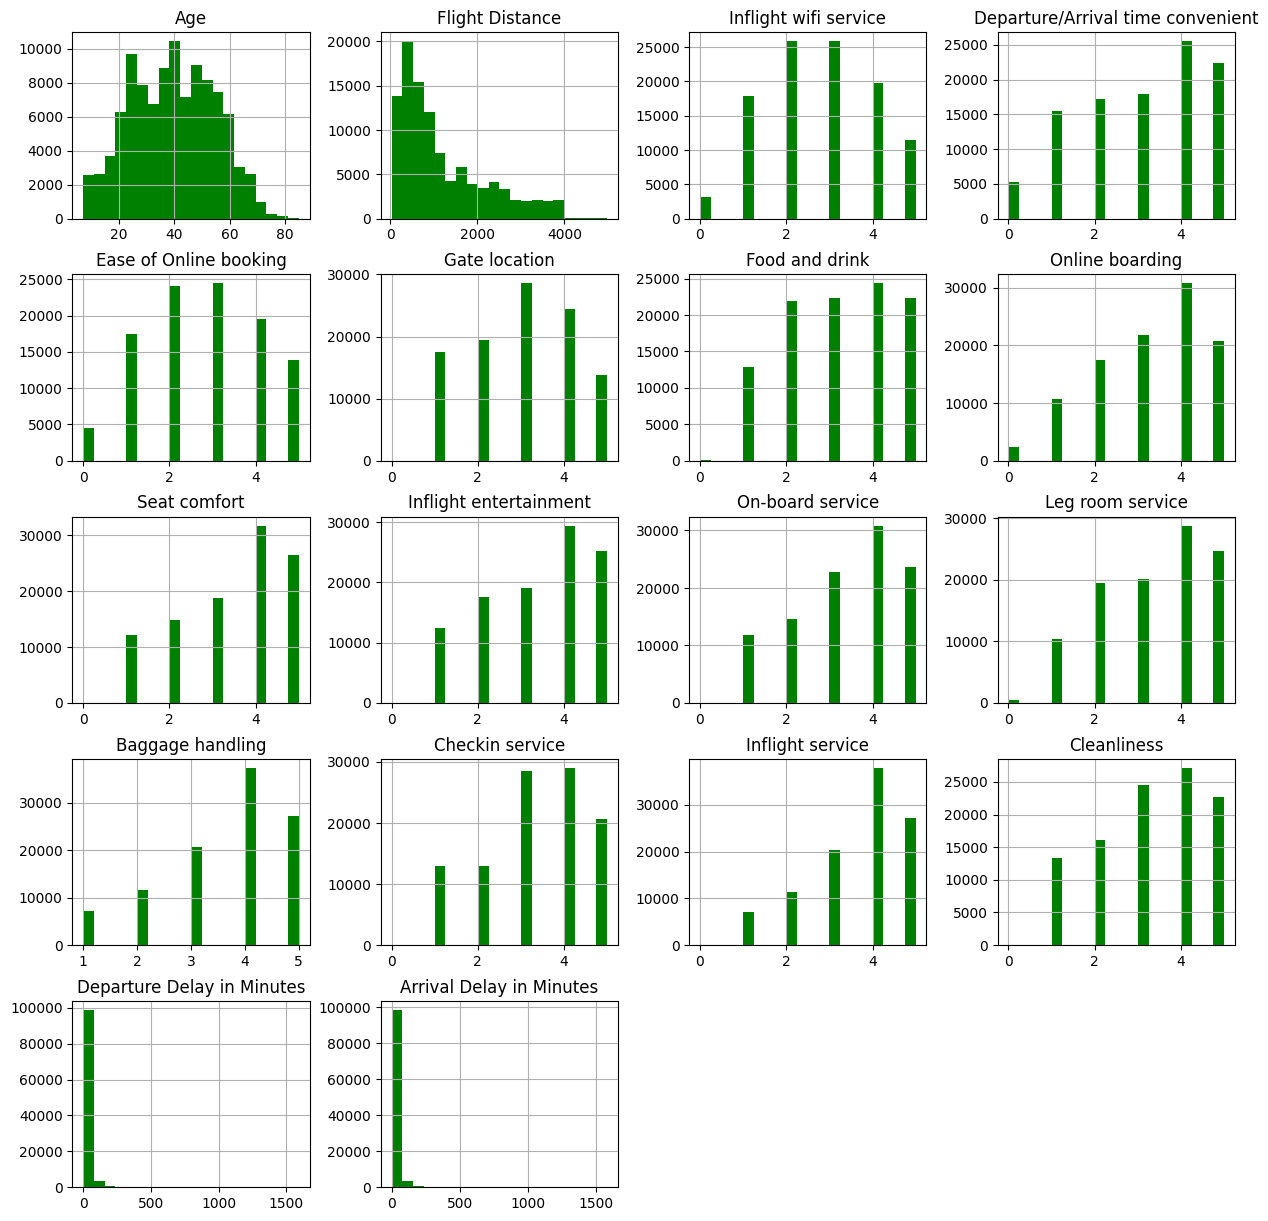

In [18]:
df.hist(bins=20, figsize=(15, 15), color='green')
plt.show()

#Column Data Encoding

In [3]:
label_encoder=LabelEncoder()
columns=df.select_dtypes(include='object').drop(columns='satisfaction').columns
for column in columns:
  df[column]=label_encoder.fit_transform(df[column])
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


#Additional Charts

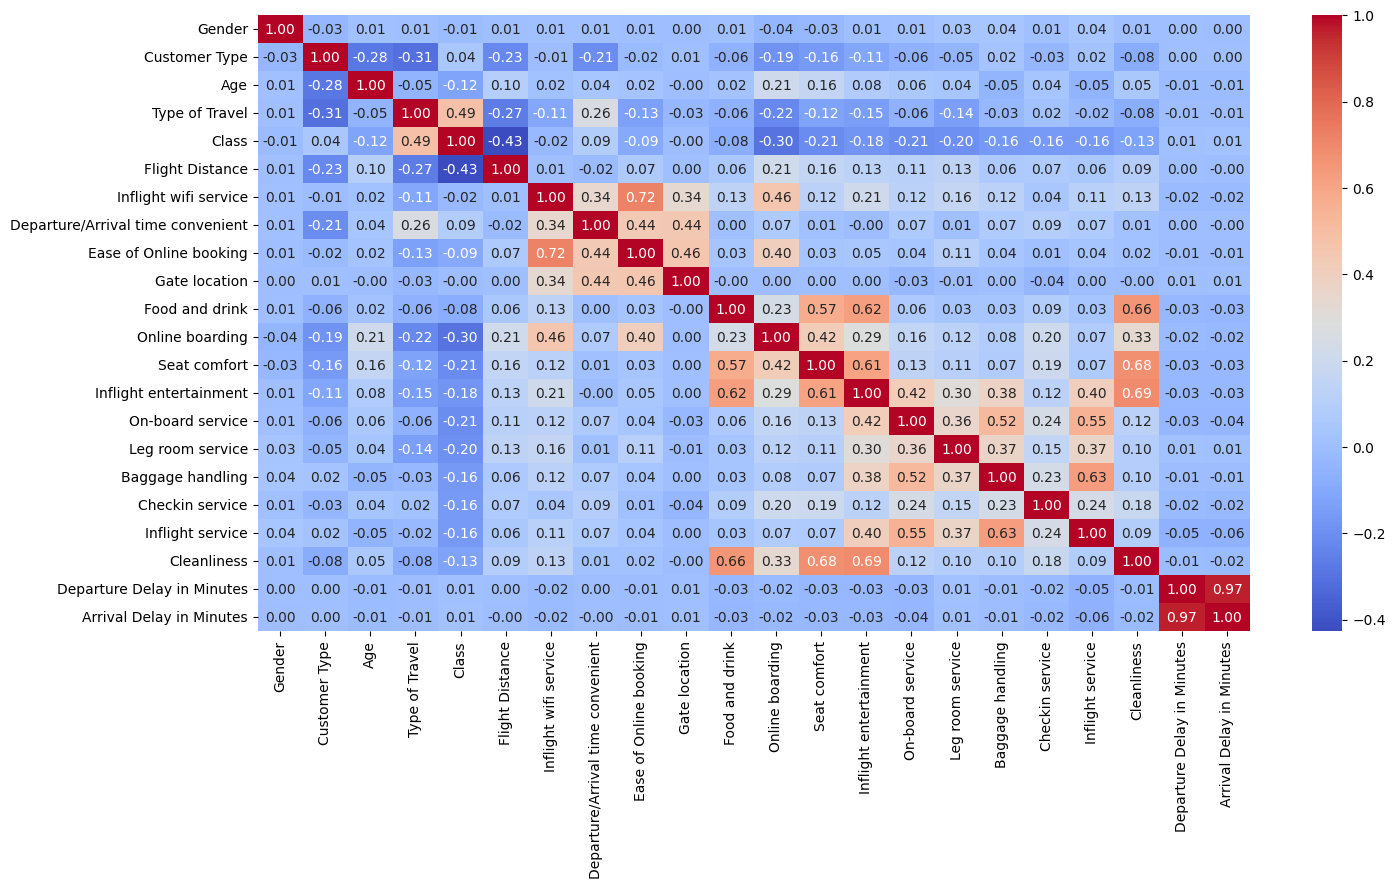

In [8]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.drop(columns='satisfaction').corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

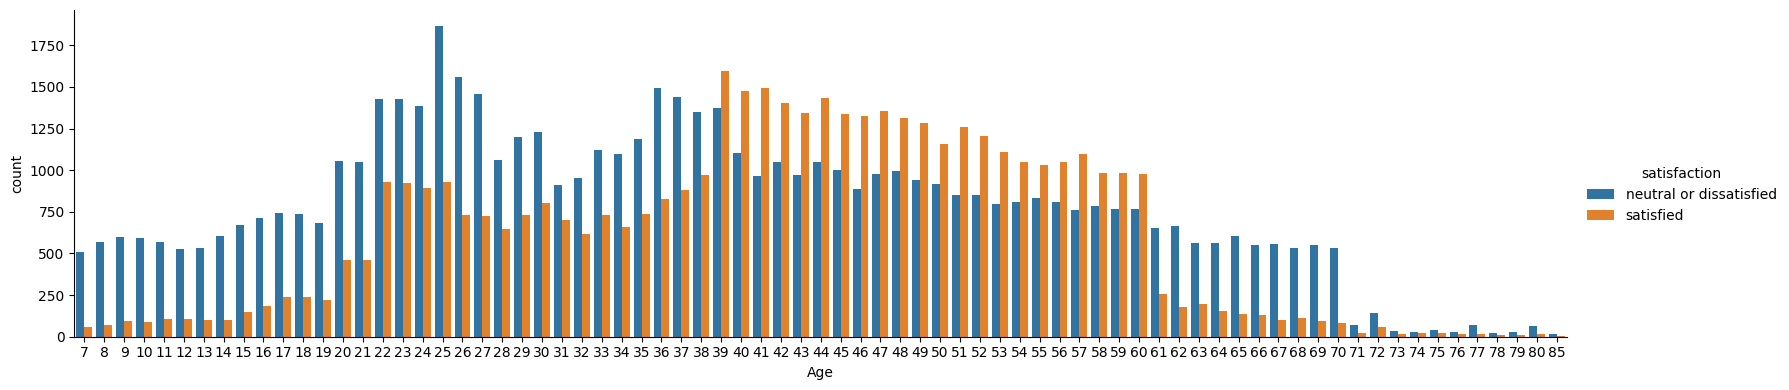

In [9]:
sns.catplot(data=df, x='Age', height=4, kind='count', aspect=4, hue='satisfaction')
plt.show()

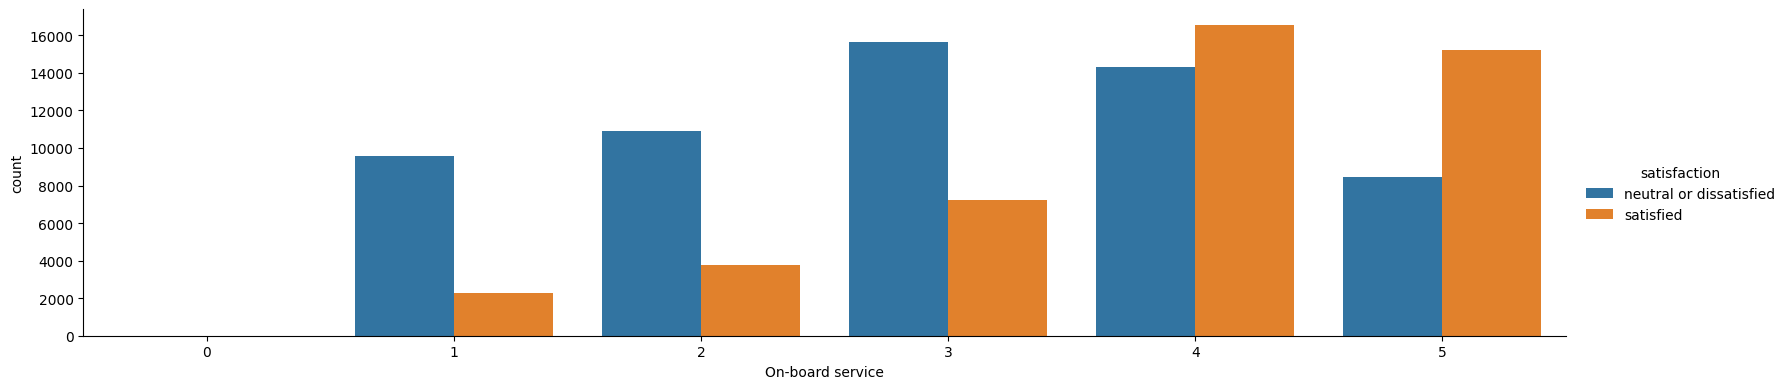

In [11]:
sns.catplot(data=df, x='On-board service', height=4, kind='count', aspect=4, hue='satisfaction')
plt.show()

#Models

In [26]:
from sklearn.tree import DecisionTreeClassifier
X=df.drop(columns='satisfaction')
Y=df['satisfaction']
model=DecisionTreeClassifier()
model.fit(X,Y)

DecisionTreeClassifier()

#Evaluation

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
x_train, x_test, y_train, t_test=train_test_split(X, Y, test_size=0.2)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(t_test, y_pred)
accuracy

0.9457677686348106

#Random Forest

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
model=DecisionTreeClassifier()
x_train, x_test, y_train, t_test=train_test_split(X, Y, test_size=0.1)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(t_test, y_pred)
accuracy

0.947647002213454

#КNeighborsClassifier



In [28]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

model=KNeighborsClassifier()
x_train, x_test, y_train, t_test=train_test_split(X_imputed, Y, test_size=0.1)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(t_test, y_pred)
accuracy

0.7503608892310654

#LogisticRegression

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

model=LogisticRegression(max_iter=10000)
x_train, x_test, y_train, t_test=train_test_split(X_imputed, Y, test_size=0.1)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(t_test, y_pred)
accuracy

0.8769127129246463

#Prediction Without Voting Columns
###В данном примере не учитываются отзывы пассажиров, то есть оценивается удовлетворенность, исходя из показателей, которые от пассажира не зависят. Но можно ответить, доволен ли будет пассажир в зависимости от расстояния, возраста, типа путешествия, класса обслуживания.

In [35]:
X=df[['Gender','Age','Customer Type','Type of Travel','Class','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']]
Y=df['satisfaction']

#Random Forest

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
model=DecisionTreeClassifier()
x_train, x_test, y_train, t_test=train_test_split(X, Y, test_size=0.1)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(t_test, y_pred)
accuracy

0.7175440284861899

#Тестирование модели на основании вручную созданных данных

In [43]:
test_inputs={
    'Gender': [1],
    'Age': [35],
    'Customer Type': [0],
    'Type of Travel': [0],
    'Class': [1],
    'Flight Distance': [1200],
    'Departure Delay in Minutes': [0],
    'Arrival Delay in Minutes': [0]
}
test_df=pd.DataFrame(test_inputs)
test_df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,35,0,0,1,1200,0,0


##Ответ «satisfied», то есть такой пассажир будет с вероятностью 76 % доволен полетом.

In [44]:
model.predict(test_df)

array(['satisfied'], dtype=object)

#Saving Prediction Мodel

In [39]:
import joblib
joblib.dump(model, 'airline_passenger_satisfaction.joblib')
['airline_passenger_satisfaction.joblib']

['airline_passenger_satisfaction.joblib']

#Загрузим сохраненную модель из файла и вызовем predict для данной модели

In [46]:
test_inputs={
    'Gender': [1, 0],
    'Age': [35, 25],
    'Customer Type': [0, 1],
    'Type of Travel': [0, 0],
    'Class': [1, 1],
    'Flight Distance': [1200, 600],
    'Departure Delay in Minutes': [0, 5],
    'Arrival Delay in Minutes': [0, 5]
}
test_df=pd.DataFrame(test_inputs)
test_df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,35,0,0,1,1200,0,0
1,0,25,1,0,1,600,5,5


#В итоге модель была загружена и успешно дала ответы на запрос тестовойвыборки, то есть первый пассажир скорее всего недоволен, а второй, скорее всего, доволен

In [47]:
trained_model=joblib.load('airline_passenger_satisfaction.joblib')
trained_model.predict(test_df)

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

##Таким образом, можно сохранить модель в файл, но при этом нужно учитывать, что размер такого файла будет большим. После выгрузки модели можно легко загрузить модель из файла и давать задачи по предсказанию определенных значений на основании вводных данных.
##При загрузке готовой модели не нужно ее дополнительно тренировать, просто вызывается метод predict и передаются тестовые данные для того, чтобы модель оценила целевые показатели.